In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 선형 회귀

- 정규 방적식 
- skelarn.linear_model.LinearRegression  
- scipy.linalg.lstsq() 함수 이용

In [2]:
import numpy as np
np.random.seed(123)
X = 2 * np.random.rand(100,1)  # 100 x 1 열벡터
# xx = np.random.rand(100)
y = 4 + 3 * X + np.random.randn(100,1) # 100 x 1 열벡터 

In [3]:
# 상수항 추가한 관찰값 X 행렬 만들기
X_b = np.c_[np.ones((100,1)), X]
X_b[0:10]

array([[1.        , 1.39293837],
       [1.        , 0.57227867],
       [1.        , 0.45370291],
       [1.        , 1.10262954],
       [1.        , 1.43893794],
       [1.        , 0.84621292],
       [1.        , 1.9615284 ],
       [1.        , 1.36965948],
       [1.        , 0.9618638 ],
       [1.        , 0.78423504]])

In [4]:
# 정규방정식(수식)으로 구하기
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.16994745],
       [2.86547676]])

## 회귀계수 추정: 오차 제곱합(회귀모형 교재 49p): $\hat{\beta} = (X^{'}X)^{-1}X^{'}Y$
\
$$ 
Y = X \beta + \epsilon \\  
$$

- 오차 제곱합 $S$ 정의 

$$
\begin{align}
S = \sum_{i=1}^{n}\epsilon_i^2  &= \varepsilon^{'}\varepsilon \\
&= (Y-X \beta)^{'}(Y-X \beta) \\
&= Y^{'}Y - Y^{'}X\beta - \beta^{'}X^{'}Y + \beta^{'}X^{'}\beta \\
\end{align}
$$

- 오차 제곱합을 최소로 하는 $\beta$를 구함: $\frac{\partial S}{\partial \beta} = 0$

$$
\begin{align}
& \frac{\partial S}{\partial \beta} = 0 \\
\\
\\
& -X^{'}Y -X^{'}Y + 2X^{'}X\beta = 0 \\
\\
& 2X^{'}X\hat{\beta} = 2X^{'}Y \\
\\
& (X^{'}X)^{-1}X^{'}X\hat{\beta} = (X^{'}X)^{-1}X^{'}Y \\
\\
\\
& \hat{\beta} = (X^{'}X)^{-1}X^{'}Y, \quad \hat{\beta}: \beta의 최소제곱 추정량 \\
\\
& \hat{Y} = X\hat{\beta},\quad \hat{Y}: Y의 추정량 \\
& \end{align}
$$

행렬 미분:
c:계수 열벡터, x:관찰값 열벡터, A: nxn 대칭 행렬 
- $\frac{\partial c^{'}x}{\partial x} = c$    
- $\frac{\partial c^{'}x}{\partial c} = x$  
- $\frac{\partial x^{'}Ax}{\partial x} = 2Ax$  

그림 저장: generated_data_plot


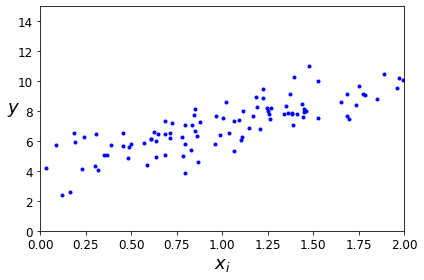

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_i$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

- $X = 0, X = 2$에 대한 $y$ 추정값 구하기  

$$ \hat{Y} = X\hat{\beta},\quad \hat{Y}: Y의 추정량 $$

In [6]:
# X = 0, X = 2에 대한 y 추정값 구하기
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1(bias 추가)
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.16994745],
       [9.90090096]])

그림 저장: linear_model_predictions_plot


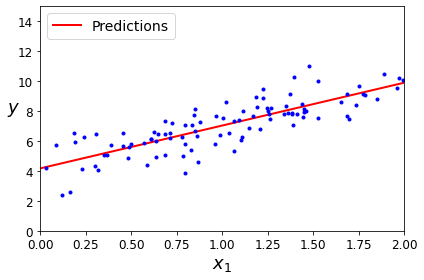

In [7]:
# 그래프 그리기
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

## sklearn.linear_model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.16994745]), array([[2.86547676]]))

In [11]:
lin_reg?

In [12]:
lin_reg.predict(X_new)

array([[4.16994745],
       [9.90090096]])

In [13]:
dir(lin_reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

### scipy.linalg.lstsq(),  np.linalg.lstsq(): cond vs rcond parameter 이름 차이 

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.16994745],
       [2.86547676]])

In [17]:
from scipy.linalg import lstsq 
theta_best_svd, residuals, rank, s = lstsq(X_b, y, cond=1e-6)
theta_best_svd, residuals, rank, s

(array([[4.16994745],
        [2.86547676]]),
 array([95.71622084]),
 2,
 array([14.60716511,  3.35973307]))

In [18]:
# 유사 역행렬
np.linalg.pinv(X_b).dot(y)

array([[4.16994745],
       [2.86547676]])

### 참고 (계산 복잡도) :n 특성수
- 역행렬: $O(n^2.4)\sim O(n^3) \rightarrow 2^2.3 \sim 2^3 \rightarrow 5.3 \sim 8 배 증가$ 
- SVD(Scikit Learn: LinearRegression): $O(n^2)$, $O(m) \rightarrow$: 특성수(n)의 제곱, 샘플수(m)에 비례 

예측 계산 복잡도: 샘플수와 특성수에 선형적으로 비례

## 경사하강법(Gradient Decent) 
- 주요용어: 학습률(learning rate), 지역최소값(local minimum), 전역최소값(global ,mimimum). parameter space
- 종류: 배치경사하강법(Batch GD), 확률적경사하강법(SGD), 미니배치경사하강법(mini-batch GD)
- 배치 경사하강법 계산 

$$ MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{(i)})^2$$
\
$$ \frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{(i)})x_j^{(i)}$$
\
$$ \nabla_{\theta} MSE(\theta) = 
\begin{equation}
   \begin{pmatrix} 
   \frac{\partial}{\partial \theta_0} MSE(\theta)  \\
   \frac{\partial}{\partial \theta_1} MSE(\theta)  \\
   \vdots \\
   \frac{\partial}{\partial \theta_n} MSE(\theta)  \\
   \end{pmatrix} 
   = \frac{2}{m}X^{T}(X\theta-y)
\end{equation}  $$

$$\theta^{(next step)} = \theta - \eta\nabla f(\theta), \quad f(\theta) = MSE(\theta)$$

In [19]:
# 배치 경사하강법
eta = 0.1                    # 학습률 0.1
n_iterations = 1000          # 1000번 반복
m = 100                      # 샘플: 100개

theta = np.random.randn(2,1) # theta_0, theta_1 초기값 임의로 선정

for iterations in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients                     # gradients = 0이 되면 theta는 수렴함

In [20]:
theta

array([[4.16994745],
       [2.86547676]])

In [21]:
X_new_b.dot(theta)  # X = 0, X =2일때 예측값

array([[4.16994745],
       [9.90090096]])

In [22]:
# 학습률 비교 그림 그리기

theta_path_bgd = [] 

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

그림 저장: gradient_descent_plot


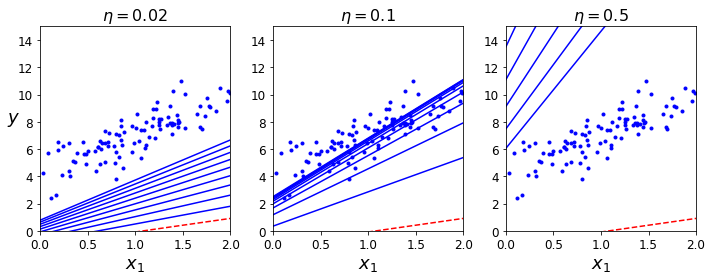

In [23]:
np.random.seed(123)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [24]:
## 확률적 경사하강법
theta_path_sgd = []
m = len(X_b)
np.random.seed(123)

그림 저장: sgd_plot


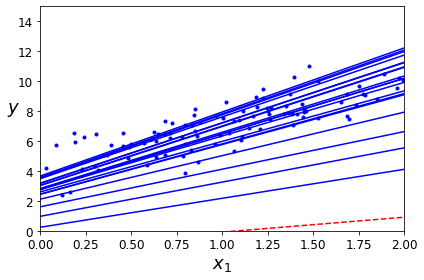

In [25]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
save_fig("sgd_plot")                                 # 책에는 없음
plt.show()                                           # 책에는 없음

In [26]:
theta

array([[4.21586873],
       [2.86152268]])

In [27]:
# scikit learn 라이브러리 SGDRegissor 적용
from sklearn.linear_model import SGDRegressor
sgd_reg =  SGDRegressor(max_iter = 1000, tol = 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())  

SGDRegressor(eta0=0.1, penalty=None)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.14983508]), array([2.89464603]))

In [29]:
# 미니배치 경사하강법

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(123)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [30]:
theta

array([[4.18031988],
       [2.87849934]])

In [31]:
# 세가지 경사하강법 비교

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


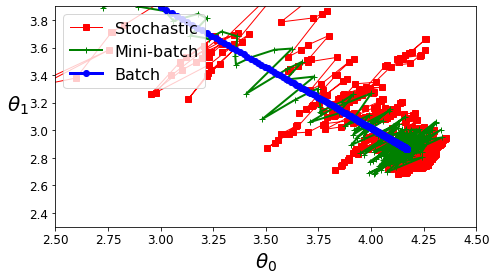

In [32]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

# 다항회귀

In [33]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [34]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

$y=0.5x^2 + x + 2$
- coef     : 1, 0.5
- intercept: 2

그림 저장: quadratic_data_plot


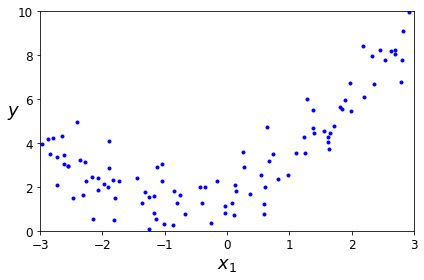

In [35]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [36]:
from sklearn.preprocessing import PolynomialFeatures

#include_bias = True, bias를 위한 1을 자동 생성 
poly_features = PolynomialFeatures(degree=2, include_bias=False)   # scikiet learn의 linear_model에서는 biase(상수항)을 자동 처리해 줌
X_poly = poly_features.fit_transform(X)   
X[0]

array([-0.75275929])

In [37]:
X_poly[0]   

array([-0.75275929,  0.56664654])

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

그림 저장: quadratic_predictions_plot


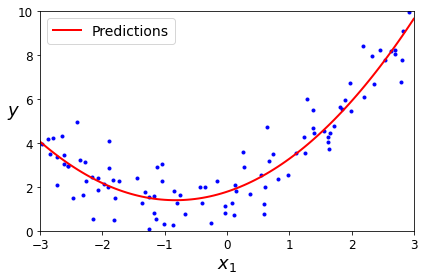

In [39]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)                      # 새로은 x 데이터 생성
X_new_poly = poly_features.transform(X_new)                        # x^2 항 데이터 생성
y_new = lin_reg.predict(X_new_poly)                                # 예측값
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

## 과소적합, 과대 적합

그림 저장: high_degree_polynomials_plot


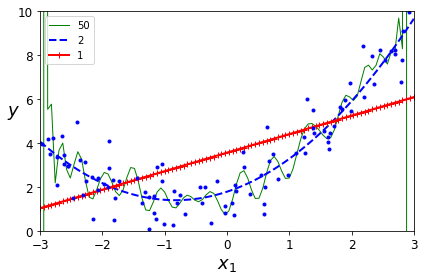

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 50), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)  # fit_transform --> fit_transform --> fit()
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width) # transform --> transform --> predict

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

# 학습곡선

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

그림 저장: underfitting_learning_curves_plot


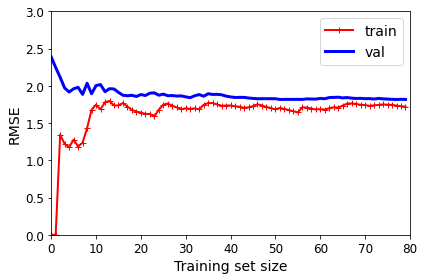

In [42]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
save_fig("underfitting_learning_curves_plot")   # 책에는 없음
plt.show()                                      # 책에는 없음

그림 저장: learning_curves_plot


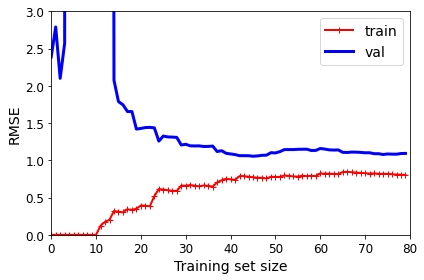

In [43]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
save_fig("learning_curves_plot")  # 책에는 없음
plt.show()                        # 책에는 없음

# 규제가 있는 선형모델(제한규제, 정규화)
  
  

- Ridge(릿지):
$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$ 



- Lasso(라쏘):
$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$



- ElasticNet(엘라스틱넷):
$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$





In [44]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)                     # X 범위: [0,3], 샘플 20개
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5   #  y = 0.5x + 1 + e
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [45]:
# 릿지 회귀: 

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # solver: auto,svd,cholesky,lsqr,sparse_cg,sag,saga,lbfgs
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

그림 저장: ridge_regression_plot


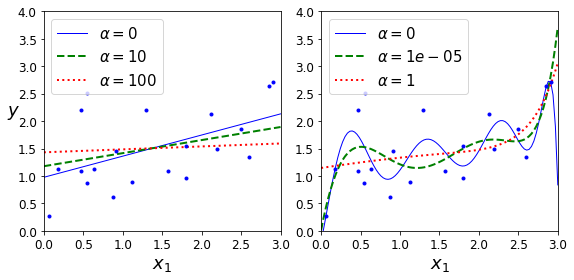

In [46]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

In [47]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

C:\Users\edmin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


그림 저장: lasso_regression_plot


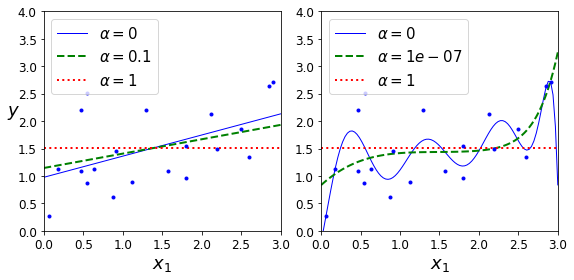

In [48]:
# 라쏘 회귀


from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [49]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [50]:
from sklearn.linear_model import ElasticNet
# Ridge != ElasticNet(l1 = 0): Ridge와 개념적으로는 동일하나 실제값은 알고리즘이 다름. 
# Lasso = ElasticNet(l1 = 1): Lasso는 동일한 결과
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 조기 종료

In [51]:
np.random.seed(42)
m = 100                                               # 샘플수: 100
X = 6 * np.random.rand(m, 1) - 3                      # X 범위: [-3,3]
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)       # y = 0.5x^2 + x + 2 + e

# 샘플 50개 훈련데이터, 50개 테스터데이터 
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [63]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

그림 저장: early_stopping_plot


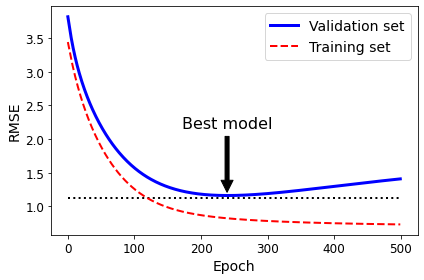

In [62]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [53]:
best_epoch, minimum_val_error, best_model

(239,
 1.3513110512453874,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [54]:
# scikit learn 조기 종료 매개변수(early_stopping) 이용
sgd_reg = SGDRegressor(penalty=None, learning_rate="constant", eta0=0.0005, random_state=42,
                      early_stopping=True, n_iter_no_change=5) # 종료조건: 성능이 n_iter_no_change=5 동안 좋아지지 않으면 종료
sgd_reg.fit(X_train_poly_scaled, y_train)
y_val_predict = sgd_reg.predict(X_val_poly_scaled)
mean_squared_error(y_val, y_val_predict), sgd_reg.n_iter_

(0.8987688364730185, 293)

In [55]:
# scikit learn 조기 종료 (tol에 의해서도 조기종료됨) 훈련데이터의 변동이 tol 만틈 5번 동안 변화가 없으면 종료
sgd_reg = SGDRegressor(penalty=None, learning_rate="constant", eta0=0.0005, tol=0.001, random_state=42,
                       n_iter_no_change=5) # 종료조건: 성능이 n_iter_no_change=5 동안 좋아지지 않으면 종료
sgd_reg.fit(X_train_poly_scaled, y_train)
y_val_predict = sgd_reg.predict(X_val_poly_scaled)
mean_squared_error(y_val, y_val_predict), sgd_reg.n_iter_

(1.3270220058005011, 245)

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [57]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

그림 저장: lasso_vs_ridge_plot


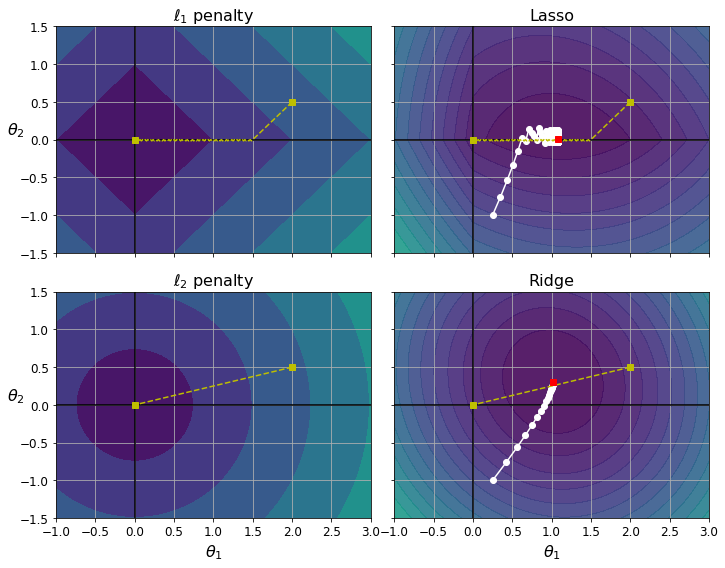

In [58]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

# 로지스틱 회귀

## 결정 경계, 2진분류

그림 저장: logistic_function_plot


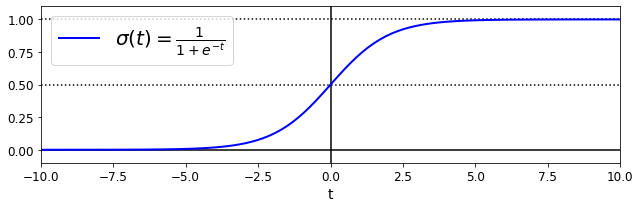

In [69]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

**식 4-16: 하나의 훈련 샘플에 대한 비용 함수**

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$

\    

**식 4-17: 로지스틱 회귀 비용 함수(로그 손실)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

\
**식 4-18: 로지스틱 비용 함수의 편도 함수**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

In [70]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [73]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [74]:
np.unique(iris.target, return_counts=True)  # 결과: target은 3종류, 데이터는 각각 50개씩임을 보여줌

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [75]:
X = iris["data"][:, 3:]  # 꽃잎 너비, Scikit Learn은 2차원 배열을 입력값으로....
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

In [78]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42) # solver="lbfgs": default
log_reg.fit(X, y)

LogisticRegression(random_state=42)


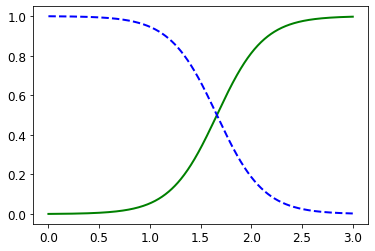

In [79]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")         # y_proba[:, 1]: 양성클래스 확률
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")    # y_proba[:, 0]: 음성클래스 확률

그림 저장: logistic_regression_plot


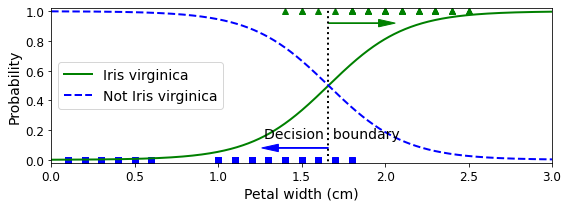

In [80]:
# 교재 그림 4-23

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [81]:
decision_boundary  # decision_boundary = X_new[y_proba[:, 1] >= 0.5][0], 사이킷런에서는 0.5보다 클때 양성, 같거나 작으면 음성클래스

array([1.66066066])

In [82]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

그림 저장: logistic_regression_contour_plot


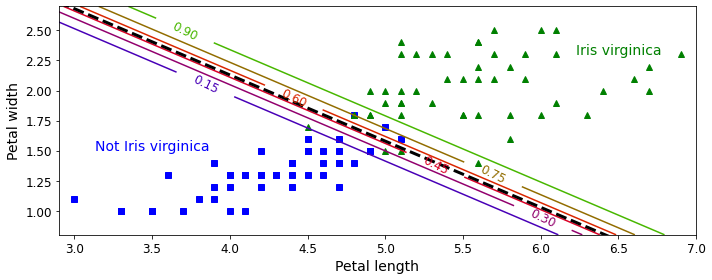

In [83]:
# 꽃잎 길이와 너비 둘다 사용하는 경우
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),     # x0: 500개 구간 200번 반복
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),   # x1: 200개 구간 500번 반복
    )
X_new = np.c_[x0.ravel(), x1.ravel()]                # (x0, x1) 순서쌍? 데이터생성함

y_proba = log_reg.predict_proba(X_new)               # 각 순서쌍에서의 확률

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)   


left_right = np.array([2.9, 7])

# 0 = coef_[0][0]*길이(left_right) + coef_[0][1]*너비 + 절편
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

## 소프트맥스 회귀: 다중분류

**식 4-20: 소프트맥스 함수**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

**식 4-22: 크로스 엔트로피 비용 함수**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**식 4-23: 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

In [84]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

그림 저장: softmax_regression_contour_plot


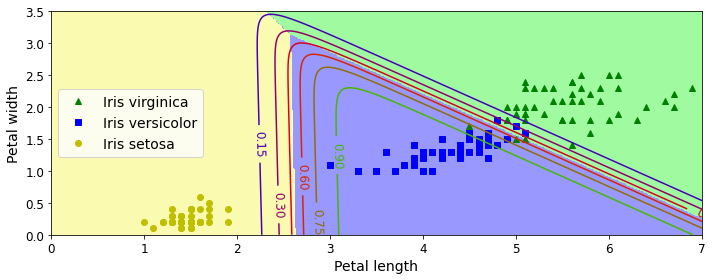

In [85]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [86]:
softmax_reg.predict([[5, 2]])

array([2])

In [87]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])